___
# Plotly and Cufflinks

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

* Plotly is an interactive visualization library: https://plotly.com/
* Cufflinks connects plotly with pandas: 
    * https://plotly.com/python/cufflinks/
    * https://github.com/santosjorge/cufflinks
    * Cufflinks has Technical Analysis charts for financial analysis with moving avg, bollinger bands, etc...

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    conda install -c plotly plotly
    conda install -c conda-forge cufflinks-py

    pip install plotly
    pip install cufflinks

**NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work.**

## Imports and Set-up

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.6.0


In [3]:
import cufflinks as cf

In [5]:
# For Notebooks - connects JS to notebook
init_notebook_mode(connected=True)

In [6]:
# For Cufflinks offline use
cf.go_offline()

### Fake Data

In [7]:
df = pd.DataFrame(np.random.randn(100,4), columns='A B C D'.split())

In [8]:
df.head()

,A,B,C,D
0,0.208090,0.151358,2.005112,-1.456573
1,-0.019342,0.979516,-0.449361,0.526237
2,0.671093,1.421473,-0.908487,0.489458
3,-0.323743,-0.070973,-0.772162,-0.212930
4,-0.089340,-0.921066,0.654163,-0.163249


In [9]:
df2 = pd.DataFrame({'Category':['A','B','C'], 'Values':[32,43,50]})

In [10]:
df2

,Category,Values
0,A,32
1,B,43
2,C,50


## Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

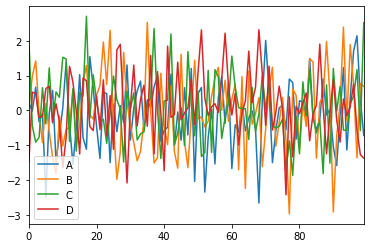

In [11]:
df.plot() # matplotlib

In [13]:
# iplot for plotly - now interactive (download, pan, zoom, ...)
df.iplot()

## Scatter

In [18]:
df.iplot(kind='scatter', x='A', y='B', mode='markers', size=10)

## Bar Plots

In [20]:
df2.iplot(kind='bar', x='Category', y='Values')

In [27]:
# call aggergate or groupby function on your data to use in a bar plot
df.count().iplot(kind='bar')
df.sum().iplot(kind='bar')

## Boxplots

In [28]:
df.iplot(kind='box')

## 3d Surface

In [32]:
df3 = pd.DataFrame({'x':[1,2,3,4,5], 'y':[10,20,30,15,5], 'z':[5,4,3,2,1]})

In [33]:
df3.head()

,x,y,z
0,1,10,5
1,2,20,4
2,3,30,3
3,4,15,2
4,5,5,1


In [37]:
df3.iplot(kind='surface', colorscale='rdylbu')
# check plotly docs for colorscales

## Spread

In [38]:
df[['A','B']].iplot(kind='spread')

## histogram

In [46]:
df['A'].iplot(kind='hist', bins=25)

In [45]:
df[['A','B']].iplot(kind='hist')

In [47]:
df.iplot(kind='hist')
# pass in entire dataframe then switch cols on/off within the viz

## Bubble

In [50]:
# similar to scatter with a size param
df.iplot(kind='bubble', x='A', y='B', size='C')
# good for economic graphs GDP, happiness, country

## scatter_matrix()

Similar to sns.pairplot()

In [52]:
# all cols need to be numerical
# crash python kernal is data set too large
df.scatter_matrix()